In [2]:
import sys
import json
import requests
import numpy as np
from PIL import Image

In [3]:
def resize(img, new_size):
    img = Image.fromarray(img)
    img = img.resize(new_size)
    return np.array(img)

In [4]:
def prepare_digit(img):
    img = resize(img, (28, 28))
    img = img.astype(np.float32)/255
    if len(img.shape) > 2:
        img = np.mean(img, axis=2)
    img = (1. - img).astype(np.float32)
    img = np.reshape(img, (28, 28, 1))
    return img

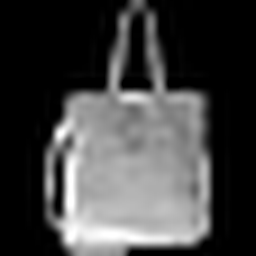

In [5]:
# img_fpath = sys.argv[1]
img_fpath = './test_images/Bag_7480.png'
img = Image.open(img_fpath)
img

In [64]:
def prepare_input(img):
    img = img.convert("F")
    img = np.array(img, dtype=np.uint8)
    img = prepare_digit(img)
    return img[:,:,0][None,:,:]

In [78]:
def decode_predictions(data):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    preds = np.argmax(data, axis=-1)
    preds = [class_names[i] for i in preds]

    return preds

In [65]:
inp = prepare_input(img)
inp.shape

(1, 28, 28)

In [66]:
# request_data = json.dumps({
#     "signature_name": "serving_default",
#     "instances": inp.tolist()
# })
# headers = {"content-type": "application/json"}

request_data = json.dumps({
    "instances": inp.tolist()
})
headers = {"content-type": "application/json"}

In [9]:
# https://l8rlg4tr0dj-496ff2e9c6d22116-8501-colab.googleusercontent.com/

In [83]:
json_response = requests.post(
    'http://localhost:8502/models/my_model/:predict',
    data=request_data, headers=headers
)

response = json.loads(json_response.content.decode())

if 'prdictions' in response:
    preds = decode_predictions(response['prdictions'])
    print('Prediction:', preds[0])
else:
    print(response)

Prediction: Bag


In [84]:
'./test_images/Bag_7480.png'

'./test_images/Bag_7480.png'